<div style="
background-color:white;
    color:black;
font-family:'Times New Roman', Times, serif;
    text-align:center;
    padding:20px;
">
  
    
  <h1>Bioseñales y Sistemas</h1>
  <h1>Práctica 5: Análisis Frecuencial de Señales</h1>

  <p style="font-size:20px; text-align:center;">Esteban Álvarez</p>

</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from scipy.signal import welch
import sympy
from sympy import ifft
import zipfile
import os

# ***A. Representación de señales en tiempo discreto***

Como ejemplo de señal discreta utilizaremos la señal analógica:

$$
x_a(t) = A \sin(2\pi F_0 t)
$$

donde:

$$
F_0 = 40\,\text{Hz} \quad (\text{frecuencia fundamental de la señal})
$$

$$
A = 5\,\text{V} \quad (\text{amplitud})
$$

$$
F_s = 1000\,\text{Hz} \quad (\text{frecuencia de muestreo}), \quad T = 0.001\,\text{s}
$$

Definamos estos parámetros en Python y tomemos un ciclo de la señal muestreada.


In [ ]:
Fo = 40  # Frecuencia fundamental de la señal
Tp = 1 / Fo  # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1 / Fs  # Periodo de muestreo
A = 5  # Amplitud de la señal

### **Señal en tiempo continuo**

In [ ]:
t = np.arange(0, Tp+T, T)  # Vector de tiempo para un ciclo de la señal con duración de Tp
x = A * np.sin(2 * np.pi * Fo * t)

### **Señal en tiempo discreto**

In [ ]:
fo=Fo/Fs #Frecuencia discretizada
n = np.arange(0, len(t))
x1 = A * np.sin(2 * np.pi * fo * n )

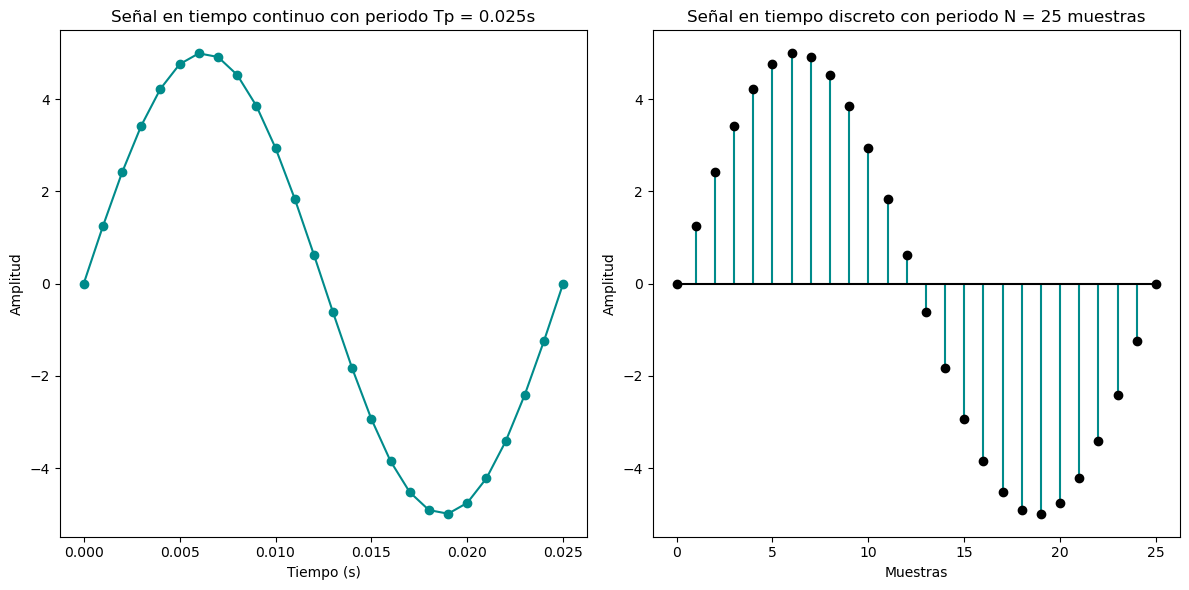

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(t, x, marker = 'o', color = 'darkcyan')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal en tiempo continuo con periodo Tp = 0.025s")

plt.subplot(1, 2, 2)
plt.stem(n, x1,linefmt='darkcyan', markerfmt = 'ko', basefmt='k-')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title("Señal en tiempo discreto con periodo N = 25 muestras")

plt.tight_layout()

### **a)	Compruebe que los valores de las primeras cinco muestras son los mismos**

In [ ]:
muestras_x = x[:5]
muestras_x1 = x1[:5]

In [ ]:
if np.all(x[:5] == x1[:5]):
    print("Las primeras 5 muestras de las señales discretas son equivalentes.")
else:
    print("Las primeras 5 muestras de las señales discretas no son equivalentes.")

Las primeras 5 muestras de las señales discretas son equivalentes.


# ***B. Energía y potencia en el dominio del tiempo***

In [ ]:
energia = sum(x**2) #Suma las magnitudes de la señal discreta al cuadrado para el cálculo de la energía

In [ ]:
potencia = energia / (len(t)-1) #Definición de potencia

In [ ]:
rms = np.sqrt(potencia) #Valor cuadrático medio

### Para hallar la energía, así como la potencia media de la señal considerando 10 ciclos de la sinusoide (250ms):

In [ ]:
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

In [ ]:
print(f'''
Energia x10(n) = {energia10}
Potencia x10(n) = {potencia10}
RMS x10(n) = {rms10}''')


Energia x10(n) = 3125.0000000000014
Potencia x10(n) = 12.500000000000005
RMS x10(n) = 3.535533905932738


In [ ]:
energia_xn = sum(x**2)
potencia_xn = energia_xn/(len(t)-1)
rms_xn = np.sqrt(potencia_xn)
print(f'''
Energia x(n) = {energia_xn}
Potencia x(n) = {potencia_xn}
RMS x(n) = {rms_xn}''')


Energia x(n) = 312.50000000000006
Potencia x(n) = 12.500000000000002
RMS x(n) = 3.5355339059327378


## La potencia es la misma que en x(n). ¿Por qué?  
La potencia es la misma en ambas, ya que desde la forma en que son calculadas estas métricas (energía, potencia), puede observarse que la energía incrementa de acuerdo al número de ciclos tomados de la señal, debido a que corresponde a la sumatoria del valor de cada n al cuadrado. Y la potencia, al depender de la energía y de la longitud del vector temporal, será independiente a la cantidad de ciclos, dado que al aumentar la energía esta será promediada por la longitud de muestras manteniendo un valor constante.

# ***C. Análisis de Fourier en tiempo discreto***

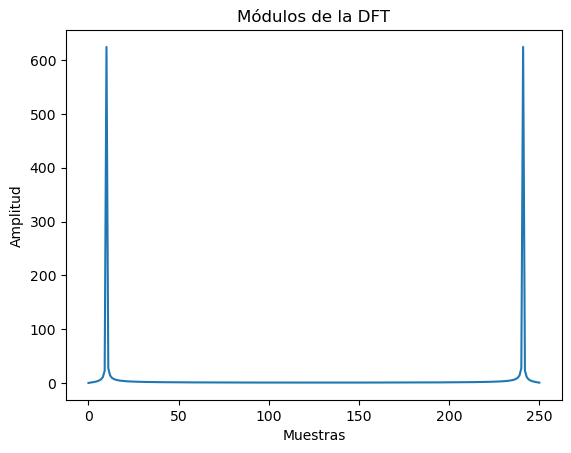

In [ ]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

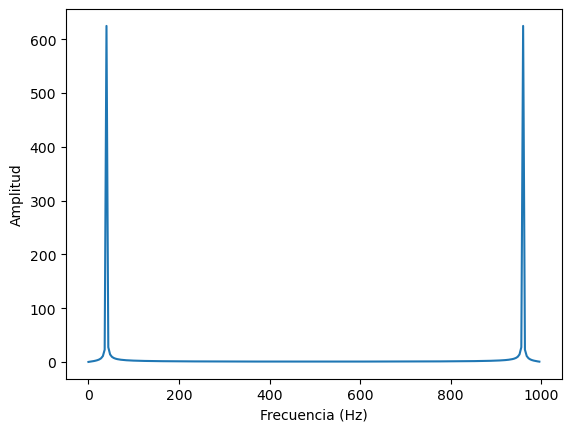

In [ ]:
# Relación directa de la DFT con las frecuencias F de tiempo continuo

N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


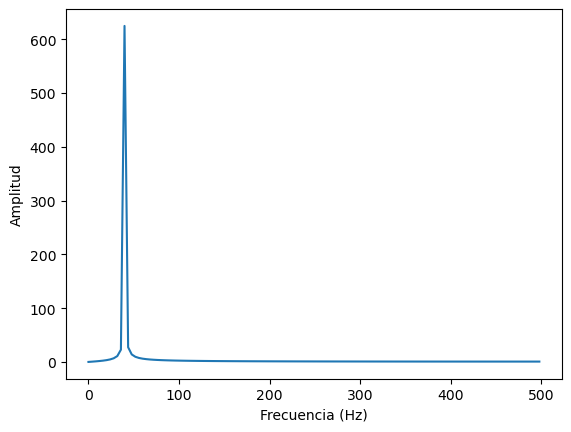

In [ ]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()


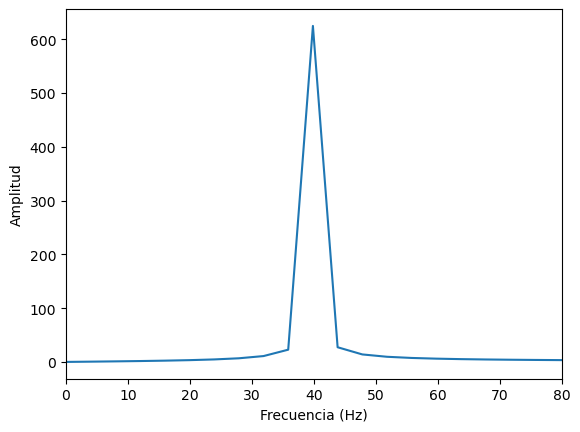

In [ ]:
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()


# ***Aplicación***

### **4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.

In [ ]:
A = 5
Fs = 3500
Fo = 40
T = 1/Fs
Tp = 1/Fo
t = np.arange(0, Tp+T, T)

In [ ]:
x = np.zeros(len(t))

In [ ]:
x = A*np.sin(40*2*np.pi*t) + A*np.sin(80*2*np.pi*t) + A*np.sin(160*2*np.pi*t)

Text(0, 0.5, 'Amplitud')

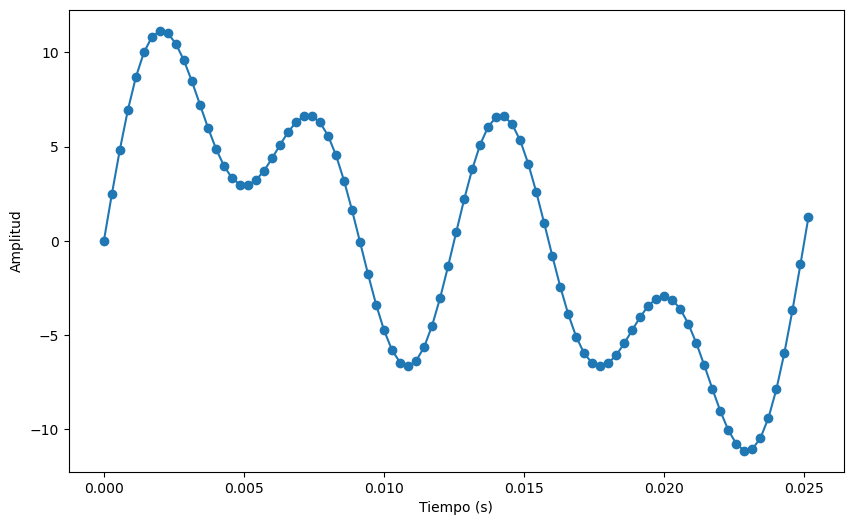

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(t,x, marker = 'o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

### **4.2** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).

In [ ]:
Tp10 = 10*Tp

In [ ]:
t_10 = np.arange (0,Tp10+T,T)

In [ ]:
x_10 = A*np.sin(40*2*np.pi*t_10) + A*np.sin(80*2*np.pi*t_10) + A*np.sin(160*2*np.pi*t_10)

Text(0.5, 1.0, 'Suma de Componentes Sinusoidales de 40, 80 y 160 Hz en 10 Periodos')

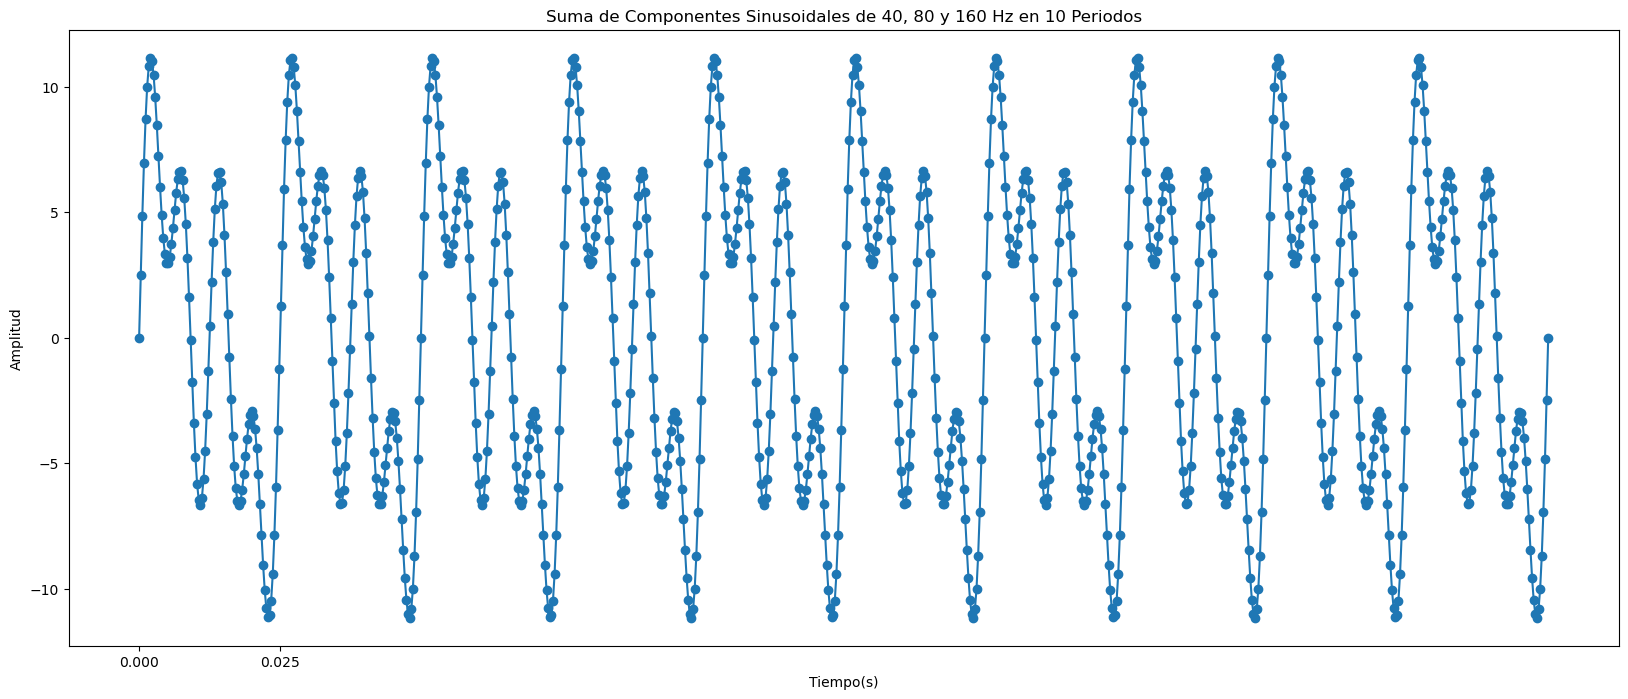

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(t_10,x_10,marker='o')
plt.xlabel('Tiempo(s)')
plt.xticks(np.arange(0, Tp + 0.025, 0.025)) # Marca el periodo de la señal
plt.ylabel('Amplitud')
plt.title("Suma de Componentes Sinusoidales de 40, 80 y 160 Hz en 10 Periodos")

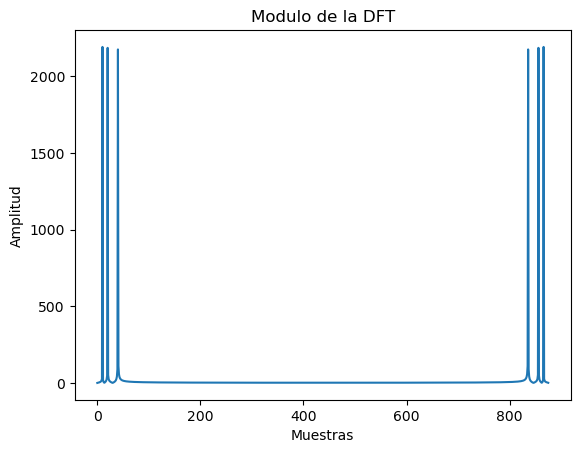

In [ ]:
x10=np.fft.fft(x_10) #Se calcula la DFT de la señal.
plt.plot(abs(x10))
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Modulo de la DFT')
plt.show()

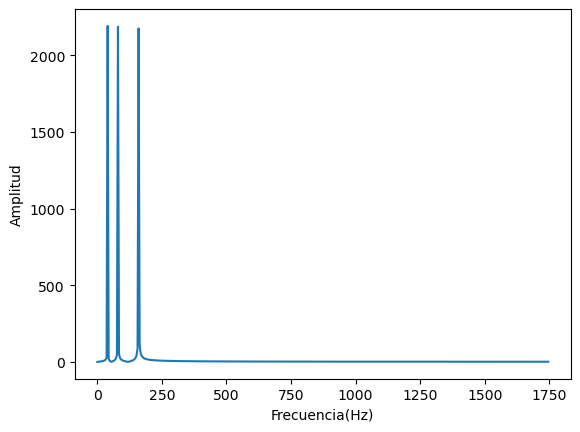

In [ ]:
N=len(x10)
F=np.arange(0,N)*Fs/N
Nmitad=int(np.ceil(N/2))
Fmitad=np.arange(0,Nmitad)*Fs/N
x10mitad=x10[0:Nmitad]
plt.plot(Fmitad,abs(x10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia(Hz)')
plt.show()

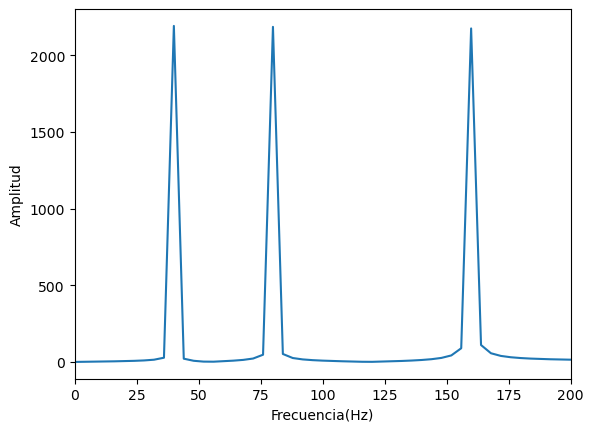

In [ ]:
plt.plot(Fmitad,abs(x10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia(Hz)')
plt.xlim(0,200)
plt.show()

### **4.3** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

Para el cálculo de la transformada inversa de Fourier se utiliza la función **np.fft.ifft()**, que reconstruye la señal en el dominio del tiempo. Ahora mueve las frecuencias bajas al centro y las más altas en el centro.

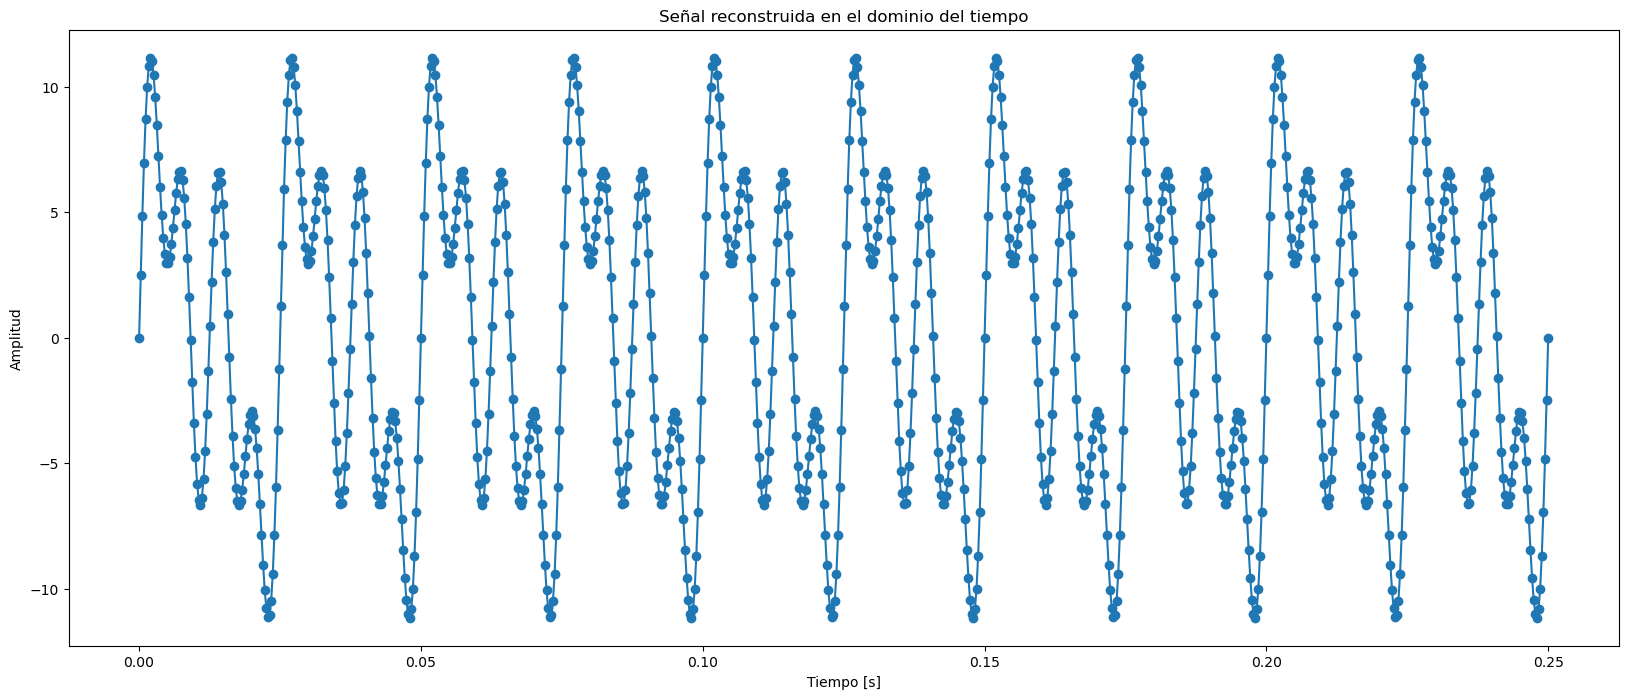

In [ ]:
x_i = np.fft.ifft(x10)
x_i = np.real(x_i)
plt.figure(figsize=(20, 8))
plt.plot(t_10, x_i, marker='o')
plt.title('Señal reconstruida en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

### **4.4**¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

![image.png](attachment:690cce0c-b926-45db-b00c-8e95c5612b3a.png)

Si, se podría decir que es un filtro, debido a que primero se le aplica transformada rápida de fourier, para que quede en el dominio de la frecuencia y tomar información de aquí para usarla después. Luego, se crea una matriz de ceros llamada F2 del tamaño de F1. Posteriormente, se escoge un rango de componentes frecuenciales de F1 que serán asignados a la matriz F2. Esto hace un filtrado, dado que anula las demás componentes espectrales dejando únicamente las frecuencias de interés.

In [ ]:
Fs = 3500
N = len(x_10)
F1 = np.fft.fft(x_10)

frecuencias = [40, 80, 160]
delta_f = Fs / N

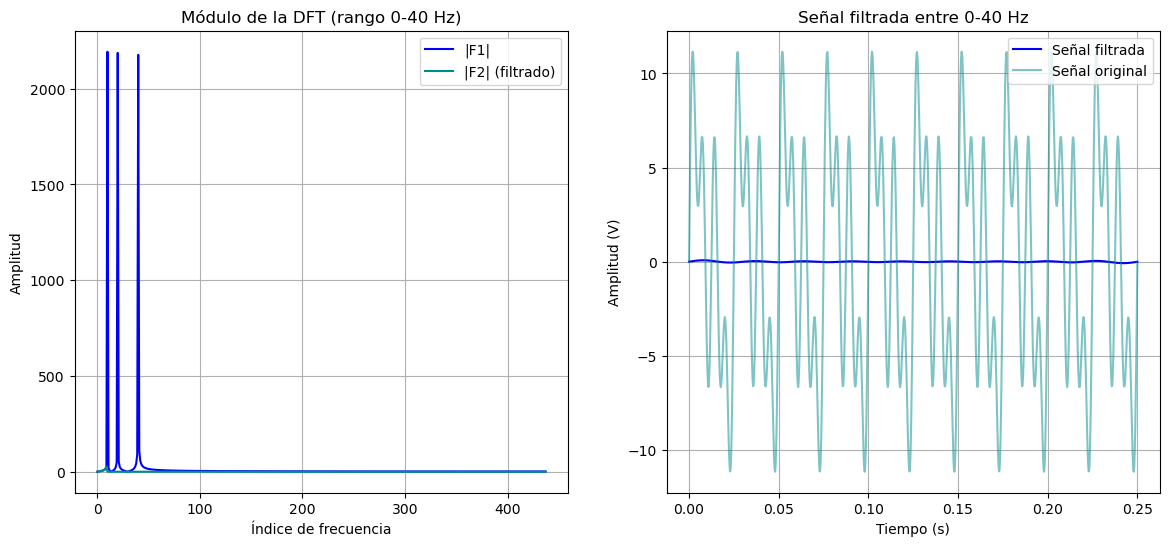

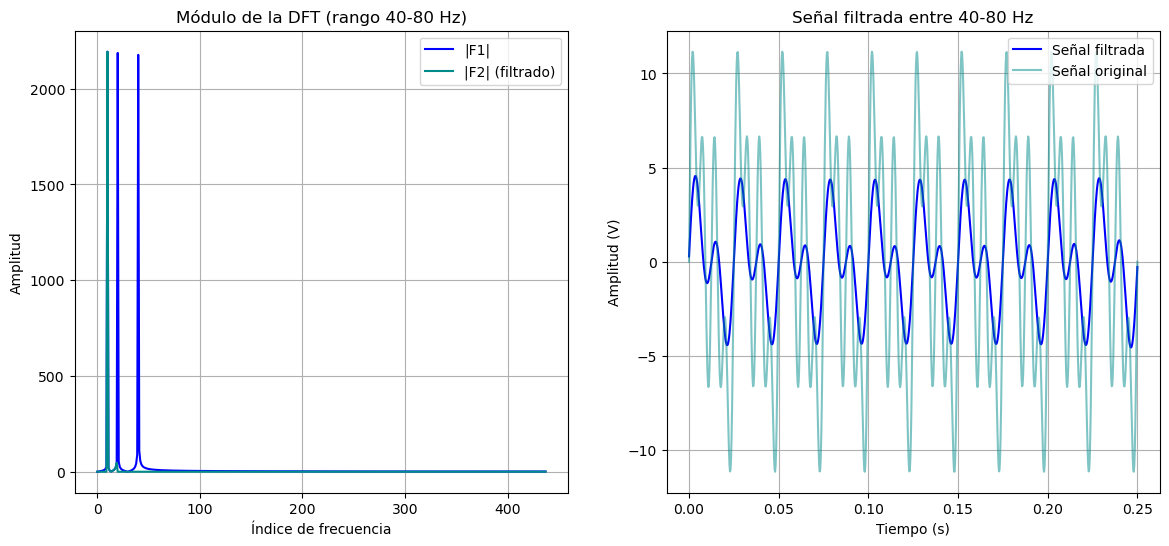

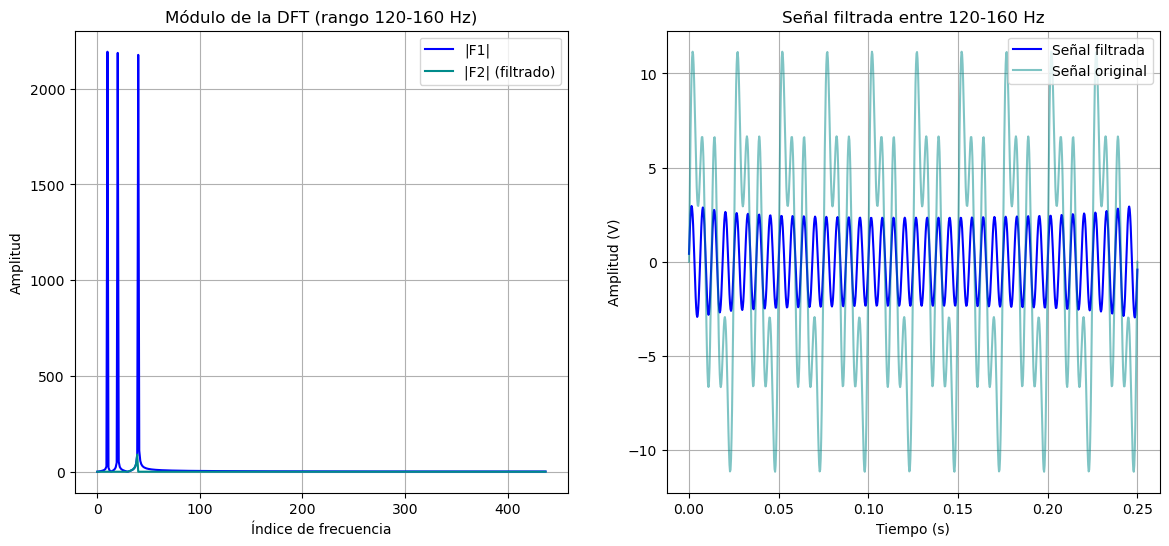

In [ ]:
for i in frecuencias:
    f_min = i - 40  # límite inferior del filtro

    # Convertimos de Hz a índices
    an_idx = int(np.round(f_min * N / Fs))
    i_idx  = int(np.round(i * N / Fs))

    # Creamos un espectro vacío y dejamos solo esa banda
    F2 = np.zeros_like(F1, dtype=complex)
    F2[an_idx:i_idx] = F1[an_idx:i_idx]
    F2[-i_idx:-an_idx] = F1[-i_idx:-an_idx]  # simetría conjugada

    # Señal reconstruida
    xr = np.fft.ifft(F2)

    plt.figure(figsize=(14, 6))

    # Espectros
    plt.subplot(1, 2, 1)
    plt.plot(np.abs(F1[:N//2]), label="|F1|", color='b')
    plt.plot(np.abs(F2[:N//2]), label="|F2| (filtrado)", color='darkcyan')
    plt.xlabel('Índice de frecuencia')
    plt.ylabel('Amplitud')
    plt.title(f'Módulo de la DFT (rango {f_min}-{i} Hz)')
    plt.legend()
    plt.grid(True)

    # Señal en el tiempo
    plt.subplot(1, 2, 2)
    plt.plot(t_10, np.real(xr), label="Señal filtrada", color='b')
    plt.plot(t_10, x_10, label="Señal original", color='darkcyan', alpha=0.5)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.title(f'Señal filtrada entre {f_min}-{i} Hz')
    plt.legend()
    plt.grid(True)

### **4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana).

In [ ]:
data_ecg = sio.loadmat('senecg.mat') #Carga del archivo

In [ ]:
print(data_ecg.keys()) #Exploración del archivo

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])


In [ ]:
señal_ecg = data_ecg['ECG'] #Extracción de la señal

In [ ]:
Fs = 250

In [ ]:
num_muestras = len(señal_ecg)
print(num_muestras)

1250


Con una frecuencia de muestreo de 250 Hz y un total de 1250 muestras, se hace la estimación de la duración de la señal ECG extraída.

In [ ]:
duracion = num_muestras/Fs
print(duracion)

5.0


La señal tiene una duración total de 5 segundos.

## *a. Visualización señal ECG*

In [ ]:
t = np.arange(0, duracion,1/250)
señal_ecg = señal_ecg.flatten()

Se verifica que la forma de la señal tenga una sola dimensión para realizar la visualización de la señal

In [ ]:
t.shape

(1250,)

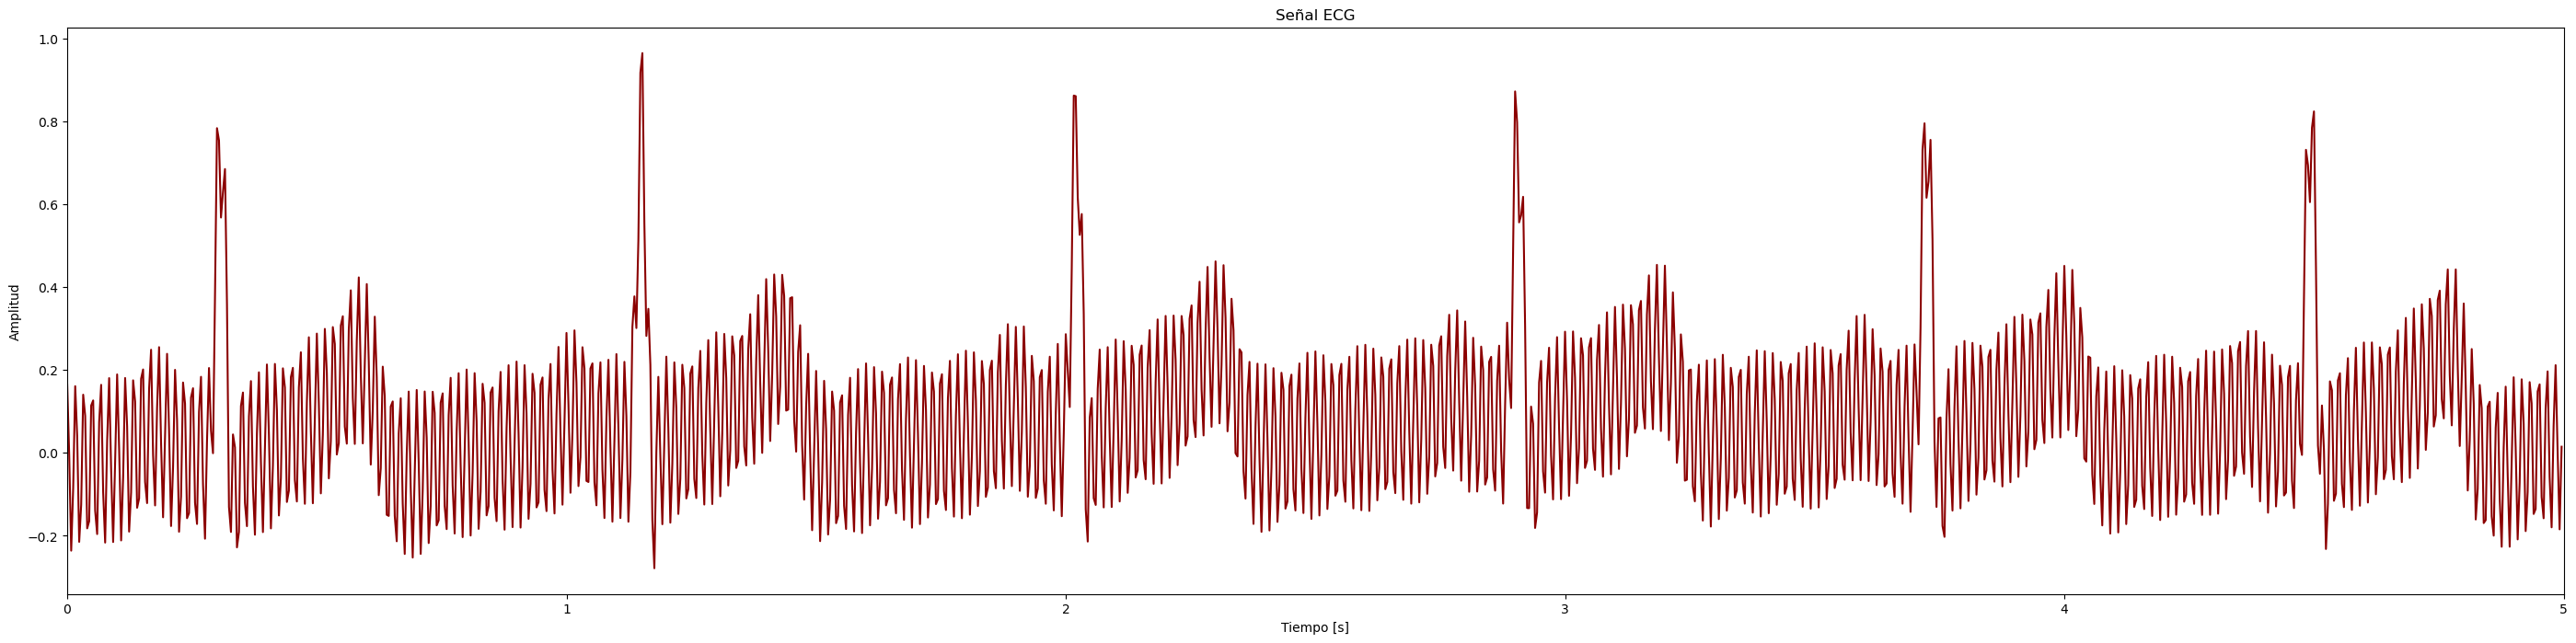

In [ ]:
plt.figure(figsize=(35,8))
plt.title('Señal ECG')
plt.plot(t, señal_ecg, color='darkred')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0,5)
plt.show()

## *b. Análisis en frecuencia*

El ancho de la ventana (nperseg = 256) se eligió de forma que proporcione un equilibrio entre la resolución en frecuencia y la resolución temporal en el cálculo del periodograma de Welch. Un valor de 256 muestras permite observar con suficiente detalle las variaciones espectrales del ECG sin perder información temporal importante. Además, se asegura que nperseg no exceda la longitud total de la señal, evitando errores en el análisis.

El solapamiento del 50% se utilizó para mejorar la suavidad del espectro promedio y reducir la varianza de la estimación de densidad espectral de potencia (PSD). Este valor es comúnmente empleado en análisis de señales fisiológicas porque mantiene la continuidad entre segmentos sin introducir redundancia excesiva.

In [ ]:
fs = 600 # Frecuencia de muestreo de la señal ECG
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, num_muestras)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning

### Periodograma de Welch

In [ ]:
f, pxx = welch(señal_ecg, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

Text(0.5, 1.0, 'Periodograma de Welch señal ECG')

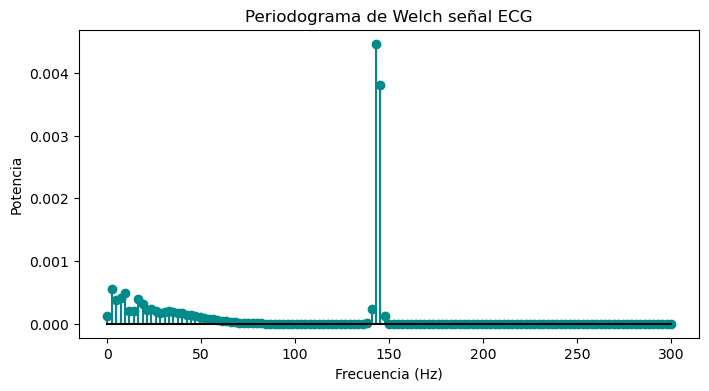

In [ ]:
plt.figure(figsize=(8,4))
plt.stem(f, pxx, linefmt = 'darkcyan', basefmt = 'k')
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma de Welch señal ECG")

### Filtrado de la señal

Al analizar la señal ECG en el dominio de la frecuencia mediante el periodograma de Welch, se evidencia que las componentes espectrales predominantes se concentran en bajas frecuencias, estableciéndose en un rango de 0-40 Hz. La concentración de la energía espectral a bajas frecuencias es característico de las señales electrocardiográficas, pues los componentes de interés, como las ondas P, el complejo QRS y la onda  T, se encuentran por debajo de loz 40 Hz. Sin embargo, se identifica un pico pronunciado alrededor de los 150 Hz, que no corresponde a ninguna componente fisiológica del ECG. Esta frecuencia elevada sugiere la presencia de ruido de alta frecuencia, posiblemente asociado al entorno eléctrico o artefactos de adquisición, lo que puede afectar la morfología de las ondas del ECG y dificultar la interpretación clínica o el posterior procesamiento de la señal. Por esto, se optó por aplicar un filtrado que preserve la información de interés. Se ha registrado que la frecuencia de la señal ECG se concentra principalmente en rangos de 0.05 a 35 Hz **[1],[2]**, y, en determinados casos, el complejo QRS puede alcanzar frecuencias de 50 Hz **[3]**. Fundamentado en lo anterior, se aplica un filtro pasa bajas con frecuencia máxima de 50 Hz.

In [ ]:
Fs = 600  # Frecuencia de muestreo de la señal ECG
Fmax = 50  # Frecuencia máxima a conservar (Hz)
F_transicion = 10  # Ancho de la banda de transición (Hz)

In [ ]:
F1 = np.fft.fft(señal_ecg)
N = len(F1)
t = np.arange(N) / Fs
F2 = np.zeros(N, dtype=complex)

In [ ]:
# Índices de corte
lim_corte1 = int(np.round(Fmax * N / Fs))
lim_corte2 = int(np.round(F_transicion * N / Fs))

F2[0:lim_corte1] = F1[0:lim_corte1] #Paso de las frecuencias bajas

hann_window = np.hanning(2 * lim_corte2)

# Suaviza la transición en el límite superior del espectro positivo
F2[lim_corte1:lim_corte1 + lim_corte2] = F1[lim_corte1:lim_corte1 + lim_corte2] * hann_window[lim_corte2:]

# Aplica la misma atenuación en el espectro negativo (simetría)
F2[-(lim_corte1 + lim_corte2):-lim_corte1] = F1[-(lim_corte1 + lim_corte2):-lim_corte1] * hann_window[:lim_corte2]

# Conserva las frecuencias bajas de la parte negativa del espectro
F2[-lim_corte1:] = F1[-lim_corte1:]

xr = np.fft.ifft(F2) #Se aplica transformada inversa a la señal filtrada
xr = np.real(xr)

In [ ]:
#Ancho de la ventana

ancho_ventana = 2*lim_corte2
print(ancho_ventana)

42


El ancho de la ventana de Hann se definió como el doble del límite de corte máximo con el fin de generar una transición suave entre las frecuencias que se conservan y las que son atenuadas. Este ancho permite aplicar la mitad descendente de la ventana sobre el extremo superior del espectro positivo y la mitad ascendente sobre el extremo correspondiente del espectro negativo, garantizando así la simetría del filtro. Un ancho de ventana demasiado pequeño produciría una transición abrupta en el dominio de la frecuencia, generando ondulaciones en la señal filtrada. Por el contrario, un ancho excesivo podría eliminar información relevante al ampliar innecesariamente la zona de atenuación. Por ello, se seleccionó un valor intermedio de 42, que logra un equilibrio adecuado entre una atenuación progresiva y una mínima distorsión en la forma temporal de la señal ECG.

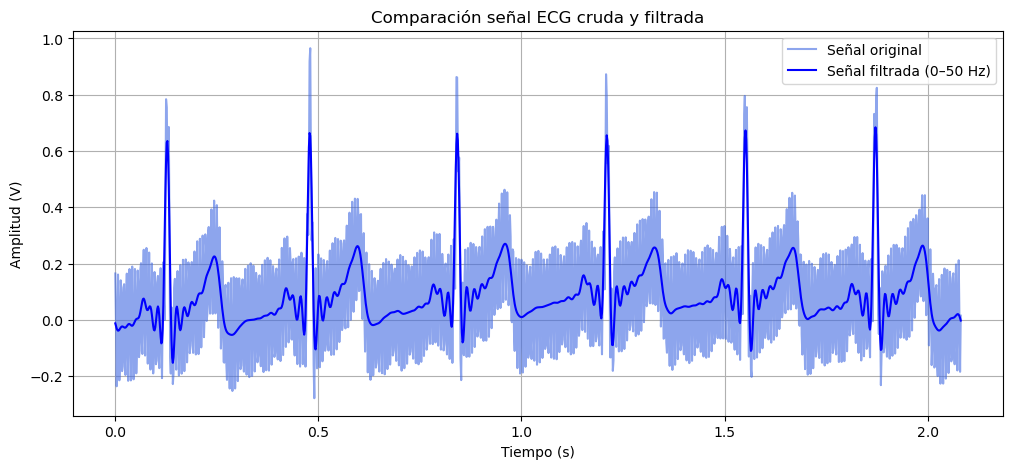

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(t, señal_ecg, label="Señal original", color='royalblue', alpha=0.6)
plt.plot(t, xr, label="Señal filtrada (0–50 Hz)", color='b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Comparación señal ECG cruda y filtrada')
plt.legend()
plt.grid(True)

Después del filtrado, se evidencia una reducción significativa del ruido de alta frecuencia, manteniendo la forma característica del ECG (ondas P, complejo QRS y onda T). Se conservan los componentes esenciales del ECG, concentrados por debajo de 50 Hz, permitiendo una mejor visualización de los picos R y una identificación más clara de los ciclos cardíacos. Esto indica que el filtro aplicado fue efectivo, ya que eliminó interferencias sin distorsionar las características morfológicas importantes de la señal. Lo anterior también se observa en el periodograma de Welch de la señal filtrada, donde ahora los espectros se mantienen inferiores a 50 Hz.

In [ ]:
f2, pxx2 = welch(xr, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

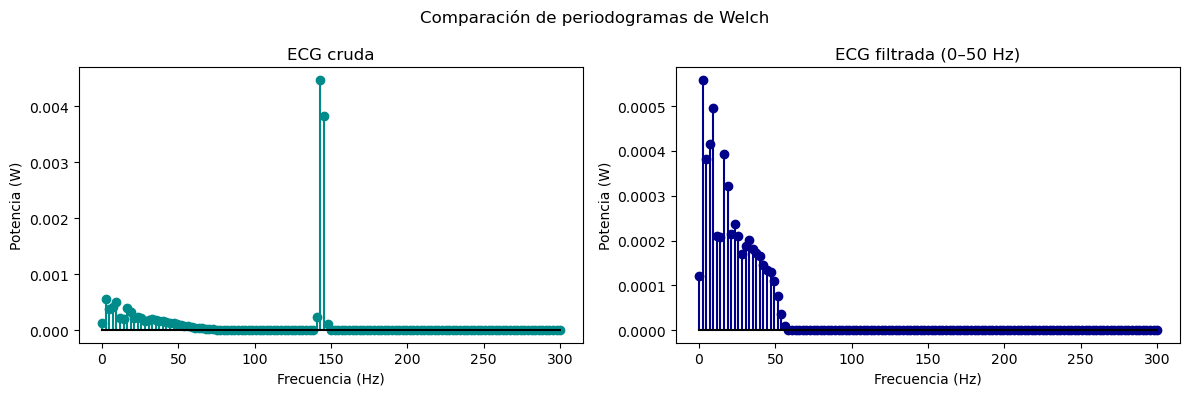

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Periodograma señal cruda
axs[0].stem(f, pxx, linefmt='darkcyan', basefmt='k')
axs[0].set_title("ECG cruda")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Potencia (W)")

# Periodograma señal filtrada
axs[1].stem(f2, pxx2, linefmt='darkblue', basefmt='k')
axs[1].set_title("ECG filtrada (0–50 Hz)")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Potencia (W)")

# Ajustar diseño
plt.suptitle("Comparación de periodogramas de Welch")
plt.tight_layout()

### **4.6** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)

In [ ]:
directorio_actual=os.getcwd()

In [ ]:
control = os.listdir(directorio_actual + "/control") #Se extraen los archivos de la carpeta control.
parkinson = os.listdir(directorio_actual + "/parkinson") #Se extraen los archivos de la carpeta Parkinson.

**Sujetos seleccionados**

Para realizar el análisis en frecuencia se seleccionaron dos sujetos (un control y un sujeto con Parkinson) de manera aleatoria. Adicionalmente, también se eligió un par de canales al azar, puesto que en el análisis previo no se lograron identificar diferencias significativas en ninguno de ellos.

In [ ]:
s_control = control[10]
s_parkinson = parkinson[3]

**Extracción de las señales**

In [ ]:
data_control= sio.loadmat(directorio_actual + "/control" + "/" + s_control)
data_parkinson= sio.loadmat(directorio_actual + "/parkinson" + "/" + s_parkinson)

data_scontrol = data_control['data']
data_sparkinson = data_parkinson['data']

In [ ]:
signalcontrol = np.reshape(data_scontrol,(data_scontrol.shape[0],data_scontrol.shape[1]*data_scontrol.shape[2]),order="F")
signalparkinson =np.reshape(data_sparkinson,(data_sparkinson.shape[0],data_sparkinson.shape[1]*data_sparkinson.shape[2]),order="F")

In [ ]:
#Señales canal 3
control_c3 = signalcontrol[2, :]
parkinson_c3 = signalparkinson[2, :]


#Señales canal 7
control_c7 = signalcontrol[6, :]
parkinson_c7 = signalparkinson[6, :]

In [ ]:
len(control_c3)

280000

**Visualización de las señales**

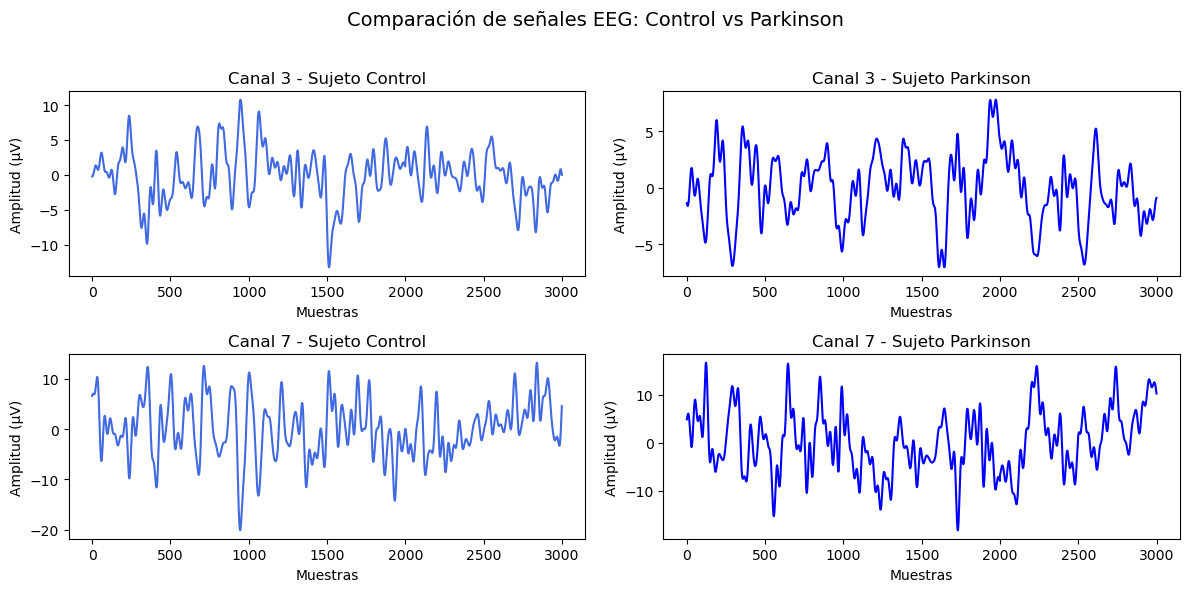

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle('Comparación de señales EEG: Control vs Parkinson', fontsize=14)

# Canal 3 - Sujeto Control
plt.subplot(2, 2, 1)
plt.plot(control_c3[:3000], color='royalblue')
plt.title('Canal 3 - Sujeto Control')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (µV)')

# Canal 3 - Sujeto Parkinson
plt.subplot(2, 2, 2)
plt.plot(parkinson_c3[:3000], color='b')
plt.title('Canal 3 - Sujeto Parkinson')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (µV)')

# Canal 7 - Sujeto Control
plt.subplot(2, 2, 3)
plt.plot(control_c7[:3000], color='royalblue')
plt.title('Canal 7 - Sujeto Control')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (µV)')

# Canal 7 - Sujeto Parkinson
plt.subplot(2, 2, 4)
plt.plot(parkinson_c7[:3000], color='b')
plt.title('Canal 7 - Sujeto Parkinson')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (µV)')

# Ajuste de espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

De acuerdo con la literatura, las señales de EEG presentan un contenido espectral comprendido aproximadamente entre 0.1 y 100 Hz. En consecuencia, la frecuencia máxima (Fmax) se establece en 100 Hz. Considerando el teorema de muestreo de Nyquist, la frecuencia mínima necesaria para representar adecuadamente esta señal en el dominio discreto sería 200 Hz, conservado características de amplitud y frecuencia. No obstante, al tratarse de una señal con alta complejidad dinámica, se seleccionó una frecuencia de muestreo cuatro veces mayor que la frecuencia máxima (Fs = 500 Hz), con el fin de garantizar una representación más precisa y estable de las variaciones rápidas que pueden presentarse en la actividad eléctrica cerebral.

**Periodograma de Welch**

Dado que el objetivo es identificar diferencias en el dominio espectral en las señales EEG de sujetos control y sujetos con Parkinson, se decidió garantizar principalmente la resolución en frecuencia al aplicar el método de Welch. Para una frecuencia de muestreo de 500 Hz, la resolución en frecuencia obtenida con un ancho de ventana de 3000 muestras es de aproximadamente 0.166 Hz (500/3000), lo cual resulta adecuado para distinguir de manera precisa las bandas de interés: Delta, Theta, Alfa, Beta y Gamma.

Esta elección permite capturar tanto las oscilaciones lentas características de las bandas bajas, como las variaciones rápidas propias de las bandas más altas, evitando la pérdida de información espectral que puede presentarse al usar ventanas demasiado cortas. Además, la duración temporal de cada segmento (6 segundos) es suficiente para representar de forma estable el contenido espectral promedio de la señal EEG, sin comprometer su resolución.

Se realizaron pruebas previas con ventanas de menor longitud, observándose una reducción en la precisión espectral, especialmente en las frecuencias bajas, lo que motivó la adopción de un ancho de ventana mayor. Adicionalmente, se garantiza que no se exceda la longitud total de la señal (aproximadamente 280.000 muestras), lo que permite un cálculo computacional eficiente. Finalmente, se aplicó un solapamiento del 50%, una configuración estándar en el análisis de EEG, ya que mejora la estabilidad del estimador de potencia y suaviza las transiciones entre ventanas consecutivas.

In [ ]:
fs = 500  # Frecuencia de muestreo de la señal EEG
nperseg = 3000  # Ancho de la ventana (~6 s)
noverlap = int(nperseg / 2)  # Solapamiento del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning

In [ ]:
# Calcular periodogramas de Welch
f_control_c3, pxx_control_c3 = welch(control_c3, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
f_parkinson_c3, pxx_parkinson_c3 = welch(parkinson_c3, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

f_control_c7, pxx_control_c7 = welch(control_c7, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
f_parkinson_c7, pxx_parkinson_c7 = welch(parkinson_c7, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

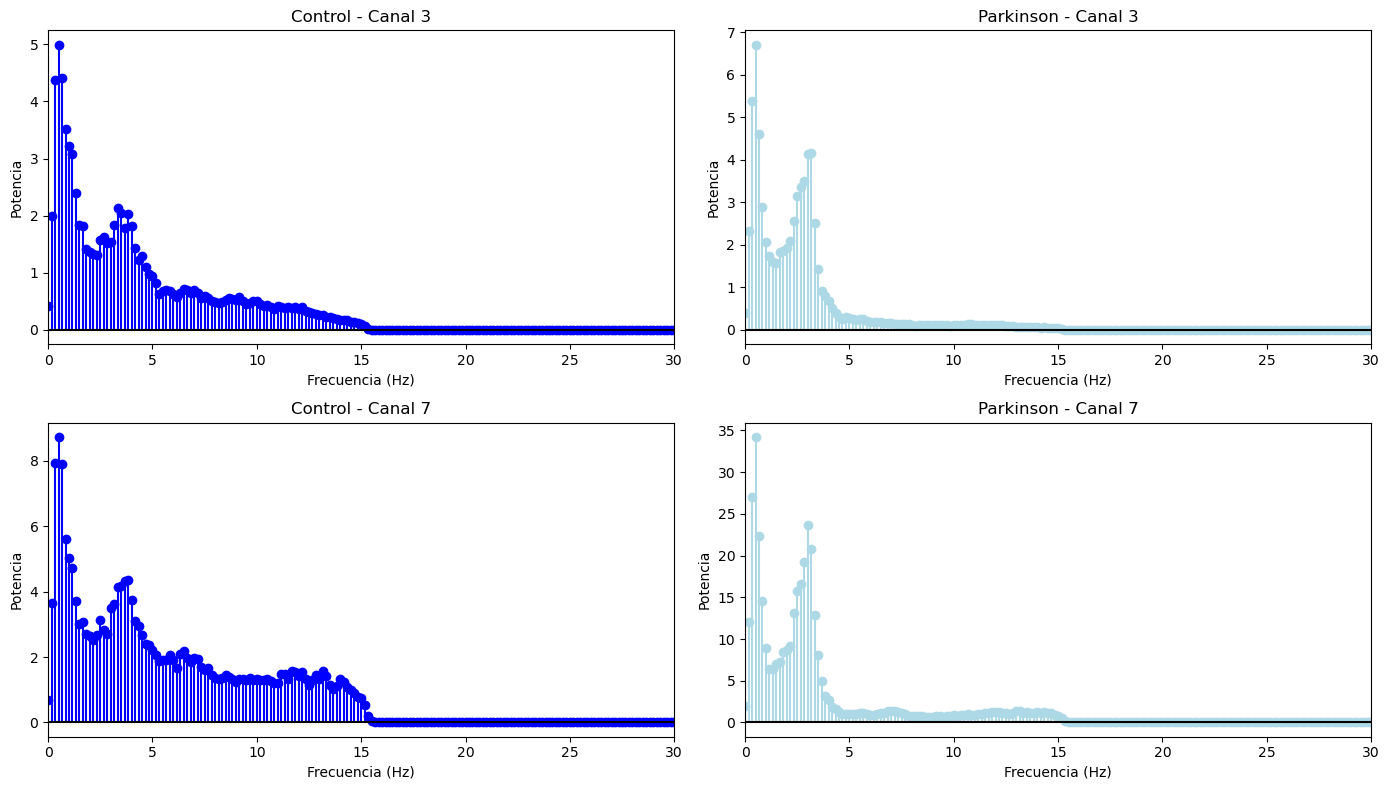

In [ ]:
# Gráfica 2x2
plt.figure(figsize=(14, 8))

# Canal 3
plt.subplot(2, 2, 1)
plt.stem(f_control_c3, pxx_control_c3, linefmt='b', basefmt="k")
plt.title("Control - Canal 3")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 30)

plt.subplot(2, 2, 2)
plt.stem(f_parkinson_c3, pxx_parkinson_c3, linefmt='lightblue', basefmt="k")
plt.title("Parkinson - Canal 3")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 30)

# Canal 7
plt.subplot(2, 2, 3)
plt.stem(f_control_c7, pxx_control_c7, linefmt='b', basefmt="k")
plt.title("Control - Canal 7")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 30)

plt.subplot(2, 2, 4)
plt.stem(f_parkinson_c7, pxx_parkinson_c7, linefmt='lightblue', basefmt="k")
plt.title("Parkinson - Canal 7")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 30)

plt.tight_layout()

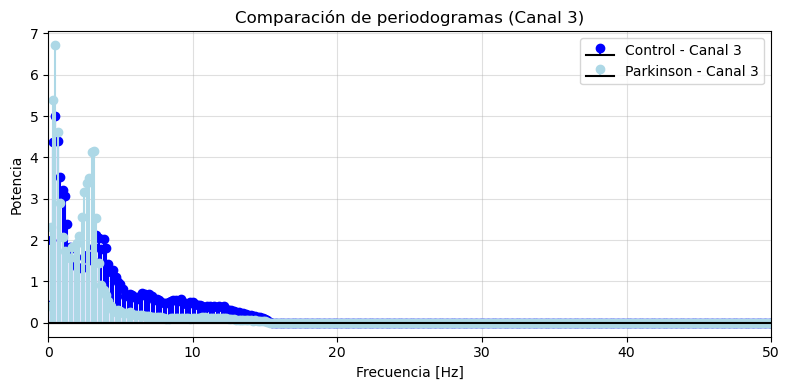

In [ ]:
#Comparación canal 3
plt.figure(figsize=(8, 4))
plt.stem(f_control_c3, pxx_control_c3, linefmt='blue', markerfmt='bo', basefmt="k", label='Control - Canal 3')
plt.stem(f_parkinson_c3, pxx_parkinson_c3, linefmt='lightblue', basefmt="k", label='Parkinson - Canal 3')

plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.title('Comparación de periodogramas (Canal 3)')
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

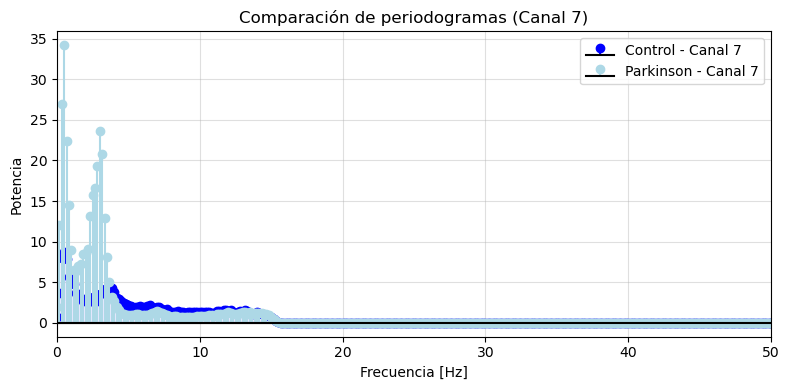

In [ ]:
#Comparación canal 7
plt.figure(figsize=(8, 4))
plt.stem(f_control_c7, pxx_control_c7, linefmt='blue', basefmt="k", label='Control - Canal 7')
plt.stem(f_parkinson_c7, pxx_parkinson_c7, linefmt='lightblue', basefmt="k", label='Parkinson - Canal 7')

plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.title('Comparación de periodogramas (Canal 7)')
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

**Análisis en las distintas bandas de frecuencia**

In [ ]:
# Definición de bandas de frecuencia
bandas = {
    'Delta': (0.2, 3.5),
    'Theta': (4, 7.5),
    'Alfa': (8, 12.5),
    'Beta': (13, 29),
    'Gamma': (30, 90)
}

In [ ]:
# Función para calcular potencia en cada banda
def calcular_potencia_banda(frecuencia, pxx, bandas):
    potencia_bandas = {}
    for banda, (f_min, f_max) in bandas.items():
        indices = np.where((frecuencia >= f_min) & (frecuencia <= f_max))
        potencia_bandas[banda] = np.trapz(pxx[indices], frecuencia[indices])
    return potencia_bandas

In [ ]:
# Señales por sujeto y canal
datos = {
    'Control': {'C3': control_c3, 'C7': control_c7},
    'Parkinson': {'C3': parkinson_c3, 'C7': parkinson_c7}
}

# Configuración de Welch
fs = 500
nperseg = 3000
noverlap = int(nperseg / 2)
ventana = np.hanning(nperseg)

# Lista para almacenar los resultados
resultados = []

for sujeto, canales in datos.items():
    for canal, señal in canales.items():
        f, pxx = welch(señal, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
        potencias = calcular_potencia_banda(f, pxx, bandas)
        # Agregar información de sujeto y canal
        potencias['Sujeto'] = sujeto
        potencias['Canal'] = canal
        # Calcular energía total de la señal
        potencias['Energia'] = np.sum(señal**2)
        resultados.append(potencias)

# Convertir a DataFrame
df_potencias = pd.DataFrame(resultados)
df_potencias = df_potencias[['Sujeto', 'Canal'] + list(bandas.keys()) + ['Energia']]

In [ ]:
df_potencias

,Sujeto,Canal,Delta,Theta,Alfa,Beta,Gamma,Energia
0,Control,C3,7.356987,2.919243,2.018877,0.394657,0.002916,4.120103e+06
1,Control,C7,13.051102,7.583968,6.106068,2.524366,0.027270,9.625558e+06
2,Parkinson,C3,9.288133,0.873379,0.520128,0.133892,0.002202,3.754668e+06
3,Parkinson,C7,45.482611,4.244070,4.067931,2.531683,0.021700,1.971994e+07


**Análisis de potencia**

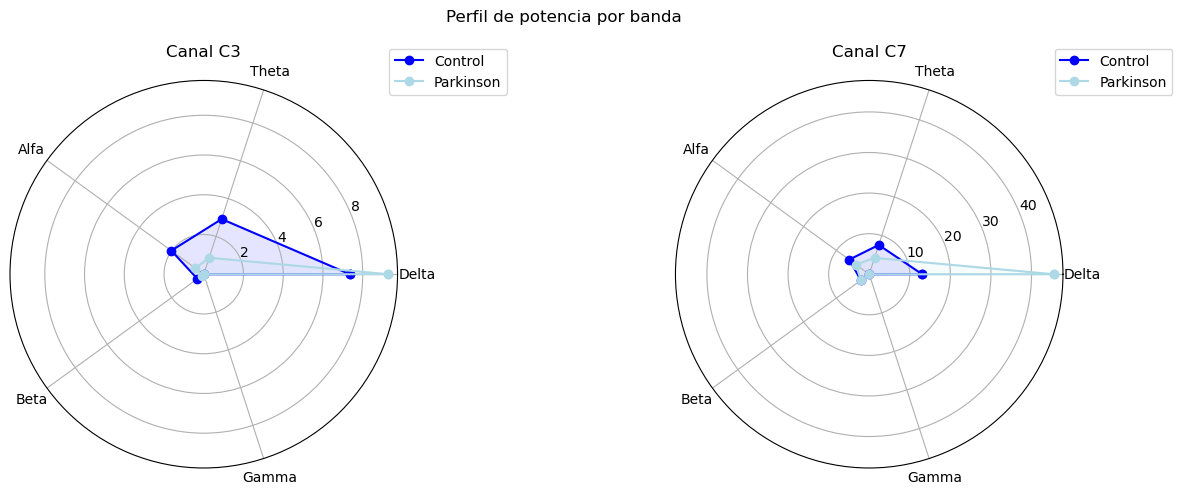

In [ ]:
# Datos
canales = df_potencias['Canal'].unique()
sujetos = df_potencias['Sujeto'].unique()
bandas_lista = list(bandas.keys())
n_bandas = len(bandas_lista)

# Colores para los sujetos
colores = {'Control': 'blue', 'Parkinson': 'lightblue'}

# Convertir bandas a ángulos para el radar
angles = np.linspace(0, 2 * np.pi, n_bandas, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

fig, axs = plt.subplots(1, len(canales), figsize=(14,5), subplot_kw=dict(polar=True))

for i, canal in enumerate(canales):
    ax = axs[i]
    df_canal = df_potencias[df_potencias['Canal']==canal]

    for sujeto in sujetos:
        valores = df_canal[df_canal['Sujeto']==sujeto][bandas_lista].values.flatten().tolist()
        valores += valores[:1]  # cerrar el círculo
        color = colores[sujeto]
        ax.plot(angles, valores, marker='o', label=sujeto, color=color)
        ax.fill(angles, valores, alpha=0.1, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(bandas_lista)
    ax.set_title(f'Canal {canal}')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.suptitle('Perfil de potencia por banda')
plt.tight_layout()

El gráfico de radar muestra el perfil de potencia por banda de frecuencia del EEG para dos grupos: personas con Parkinson y grupo control, comparados en los canales cerebrales C3 y C7. Cada eje del gráfico representa una banda de frecuencia (Delta, Theta, Alfa, Beta y Gamma), y la distancia desde el centro indica la potencia relativa en cada banda. En el canal C3, el grupo con Parkinson presenta una potencia significativamente mayor en la banda Delta, mientras que en Theta y Alfa, el grupo control muestra valores superiores. Las bandas Beta y Gamma tienen potencias bajas y similares en ambos grupos. En el canal C7, se observa nuevamente un aumento marcado de la potencia Delta en el grupo Parkinson, superando ampliamente al grupo control. En Theta y Alfa, el grupo control mantiene mayor potencia, mientras que Beta y Gamma siguen siendo bajas y comparables. Estos hallazgos sugieren que la enfermedad de Parkinson se asocia con un incremento de la actividad en frecuencias lentas (Delta), lo cual puede reflejar disfunción subcortical o degeneración neuronal. Además, se observa una disminución en las bandas Theta y Alfa, relacionadas con procesos cognitivos y atencionales. El patrón es consistente en ambos hemisferios, lo que indica una disfunción cerebral generalizada más que localizada. En conjunto, el gráfico evidencia una ralentización de la actividad cerebral en el grupo con Parkinson en comparación con el grupo control.

**Análisis de energía**

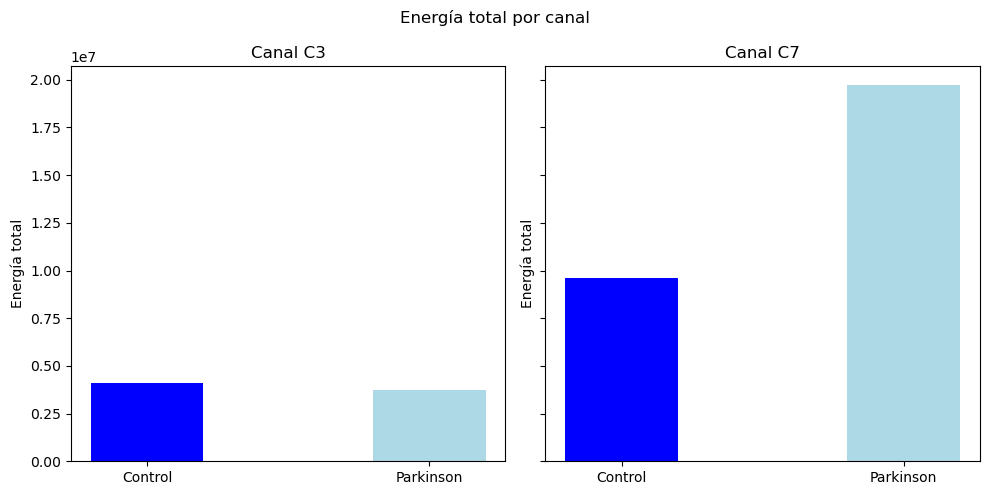

In [ ]:
fig, axs = plt.subplots(1, len(canales), figsize=(10,5), sharey=True)

x = np.arange(len(sujetos))
ancho = 0.4  # un poco más ancho que antes
colores = ['blue', 'lightblue']  # Control y Parkinson

for i, canal in enumerate(canales):
    ax = axs[i]
    df_canal = df_potencias[df_potencias['Canal']==canal]
    energias = df_canal['Energia'].values
    ax.bar(x, energias, width=ancho, color=colores)

    ax.set_xticks(x)
    ax.set_xticklabels(sujetos)
    ax.set_ylabel('Energía total')
    ax.set_title(f'Canal {canal}')

plt.suptitle('Energía total por canal')
plt.tight_layout()

## *Conclusiones*  
- A lo largo de esta práctica se logró representar adecuadamente una señal sinusoidal en tiempo continuo y discreto, verificando la consistencia entre ambas y destacando la importancia de la frecuencia de muestreo en la preservación de la información. Asimismo, se determinaron la energía y la potencia de la señal, diferenciando entre señales de energía finita y señales periódicas con potencia finita.  
- El análisis de Fourier permitió descomponer señales complejas en sus componentes frecuenciales, validar sus características espectrales y reconstruirlas mediante la transformada inversa sin pérdida significativa de información. La implementación de un filtrado en frecuencia evidenció el impacto directo sobre la señal temporal, demostrando la utilidad de esta técnica para la supresión de componentes no deseadas.  
- El análisis del ECG mediante el método de Welch permitió obtener una estimación espectral con menor varianza, identificando las principales componentes en frecuencia de la señal y mejorando su interpretación.

## *Referencias bibiliográficas*

* **[1]** Xie L, Li Z, Zhou Y, He Y, Zhu J. Computational Diagnostic Techniques for Electrocardiogram Signal Analysis. Sensors (Basel). 2020 Nov 5;20(21):6318. doi: 10.3390/s20216318. PMID: 33167558; PMCID: PMC7664289.
* **[2]** “ECG Report E6001,” King et al. Group, Center for International Scientific Logistics (CISL), Columbia University. [Online]. Available: https://cisl.columbia.edu/kinget_group/student_projects/ECG%20Report/E6001%20ECG%20final%20report.htm
* **[3]** Tereshchenko LG, Josephson ME. Frequency content and characteristics of ventricular conduction. J Electrocardiol. 2015 Nov-Dec;48(6):933-7. doi: 10.1016/j.jelectrocard.2015.08.034. Epub 2015 Aug 28. PMID: 26364232; PMCID: PMC4624499.